In [26]:
## Data cleaning and preprocessing 

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Loading The Insurance claim dataset
df = pd.read_csv(r"C:\Users\PAUL\Desktop\ML_Projects\dataset\Train_data.csv")

In [29]:
df.shape

(7160, 14)

In [30]:
df.describe

<bound method NDFrame.describe of      Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
1          H2037               2015        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
4          H5053               2014        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   N               V      V          U               

In [31]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [32]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7155    False
7156    False
7157    False
7158    False
7159    False
Length: 7160, dtype: bool

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [35]:
df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [37]:
## To show claim vs not claim

df['Claim'].value_counts(normalize=True)

Claim
0    0.771788
1    0.228212
Name: proportion, dtype: float64

<Axes: xlabel='Claim', ylabel='count'>

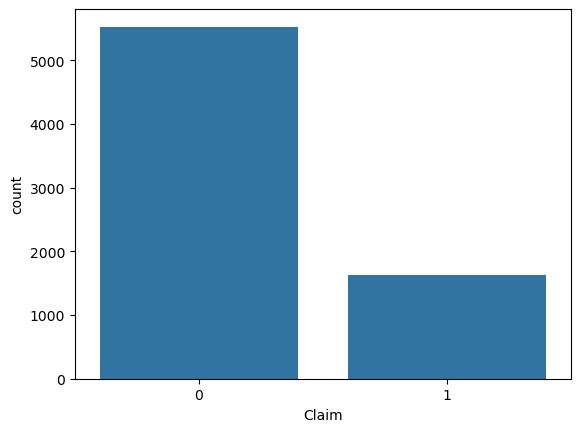

In [38]:
sns.countplot(x='Claim', data=df)

In [39]:
## Misiing Values

df.isnull().sum().sort_values(ascending=False)

Date_of_Occupancy     508
Building Dimension    106
Geo_Code              102
Garden                  7
Customer Id             0
YearOfObservation       0
Building_Fenced         0
Building_Painted        0
Residential             0
Insured_Period          0
Building_Type           0
Settlement              0
NumberOfWindows         0
Claim                   0
dtype: int64

In [40]:
## Percentage of missing values

(df.isnull().mean() * 100).sort_values(ascending=False)

Date_of_Occupancy     7.094972
Building Dimension    1.480447
Geo_Code              1.424581
Garden                0.097765
Customer Id           0.000000
YearOfObservation     0.000000
Building_Fenced       0.000000
Building_Painted      0.000000
Residential           0.000000
Insured_Period        0.000000
Building_Type         0.000000
Settlement            0.000000
NumberOfWindows       0.000000
Claim                 0.000000
dtype: float64

In [ ]:
#/ FEATURE CLASSIFICATION  #/

In [41]:
## Grouping dats into categoritical and numerical
cat_col = [col for col in df.columns if df[col].dtype == "object"]
num_col = [col for col in df.columns if df[col].dtype != "object"]

print("Categorial Columns", cat_col)
print("Numerical Columns", num_col)

Categorial Columns ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']
Numerical Columns ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim']


In [42]:
## Duplicated values for categorical columns
df[cat_col].nunique()

Customer Id         7160
Building_Painted       2
Building_Fenced        2
Garden                 2
Settlement             2
NumberOfWindows       11
Geo_Code            1307
dtype: int64

In [43]:
## Duplicated value for numerical columns
df[num_col].nunique()

YearOfObservation        5
Insured_Period         401
Residential              2
Building Dimension    2043
Building_Type            4
Date_of_Occupancy      134
Claim                    2
dtype: int64

In [ ]:
##  Univariate Analysis

array([[<Axes: title={'center': 'YearOfObservation'}>,
        <Axes: title={'center': 'Insured_Period'}>,
        <Axes: title={'center': 'Residential'}>],
       [<Axes: title={'center': 'Building Dimension'}>,
        <Axes: title={'center': 'Building_Type'}>,
        <Axes: title={'center': 'Date_of_Occupancy'}>],
       [<Axes: title={'center': 'Claim'}>, <Axes: >, <Axes: >]],
      dtype=object)

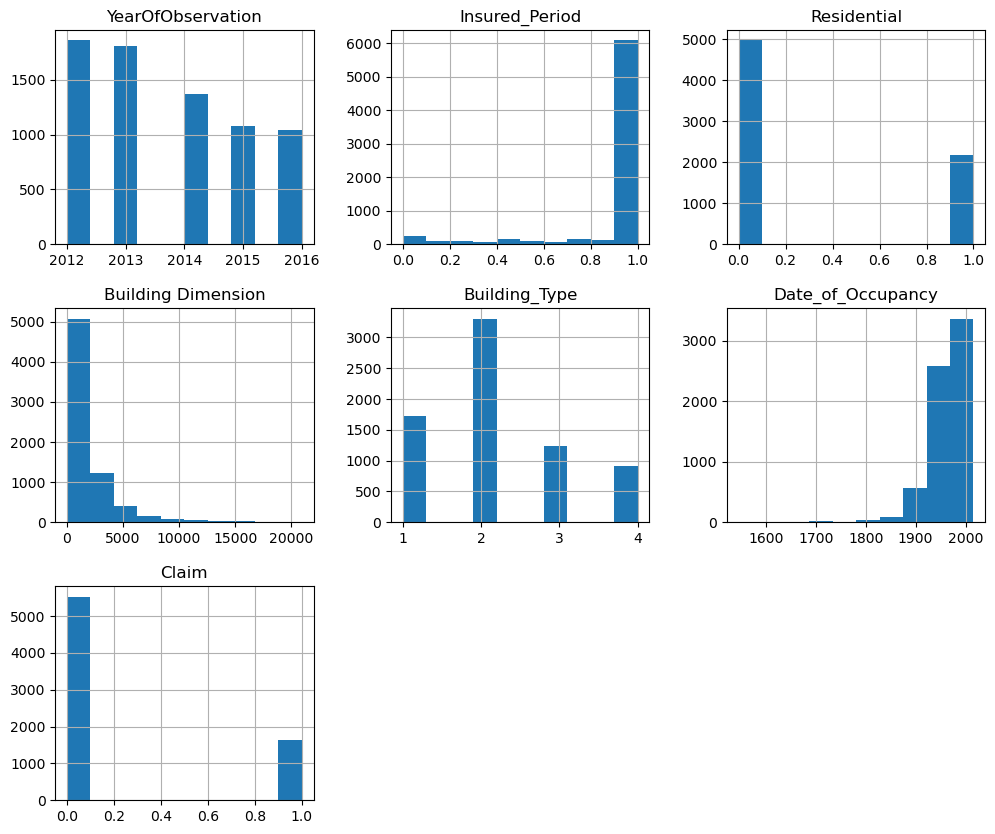

In [ ]:
## Ploting numerical col
df[num_col].hist(figsize=(12,10))

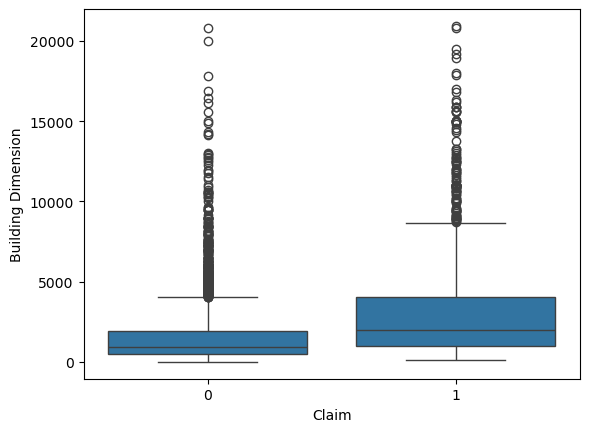

In [66]:
sns.boxplot(x='Claim', y='Building Dimension', data=df)
plt.show()

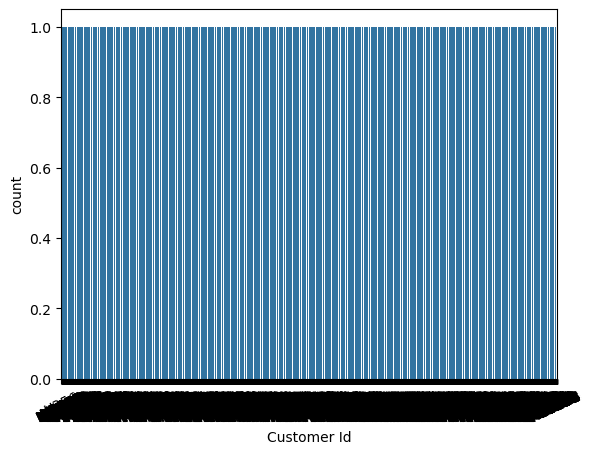

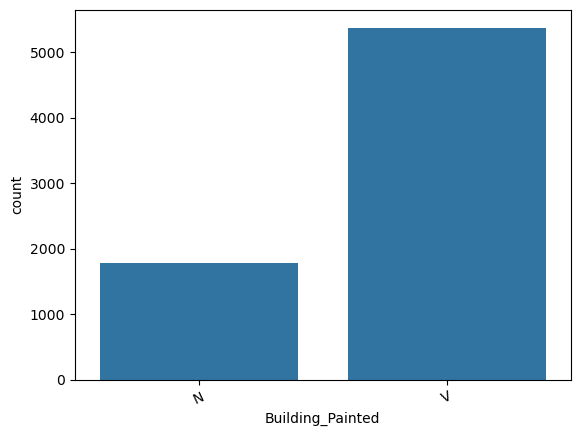

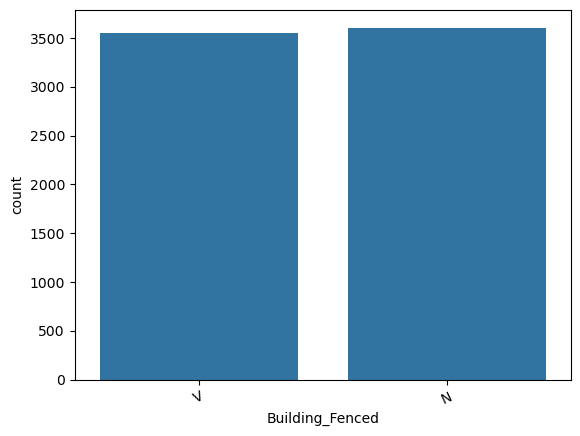

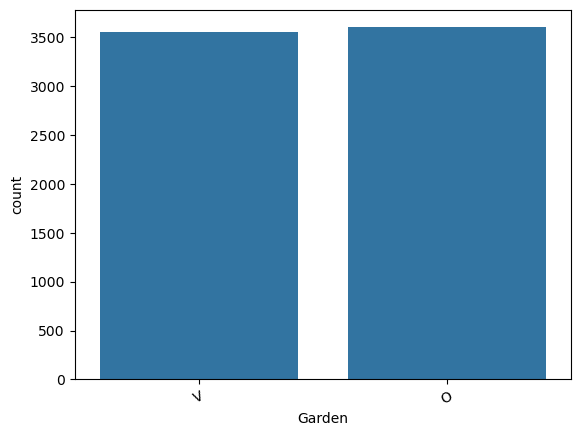

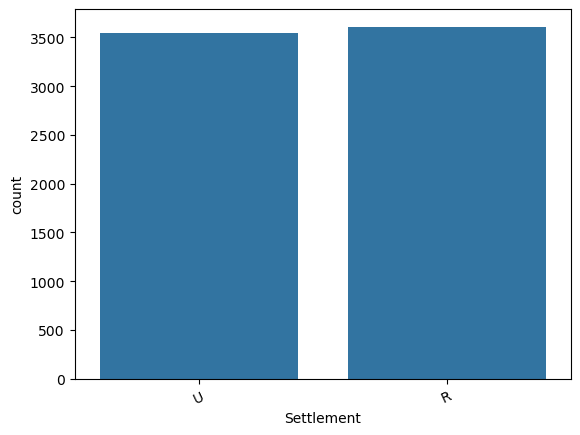

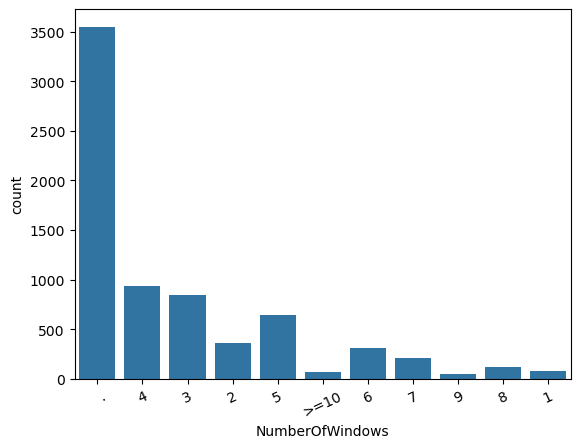

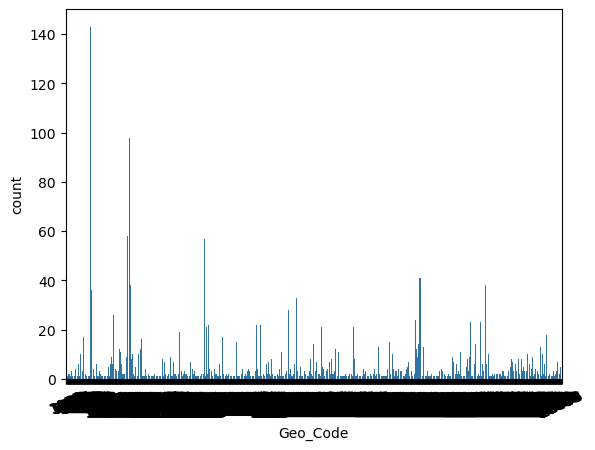

In [48]:
for col in cat_col:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=25)
    plt.show()

In [ ]:
## Bivariate Analysis

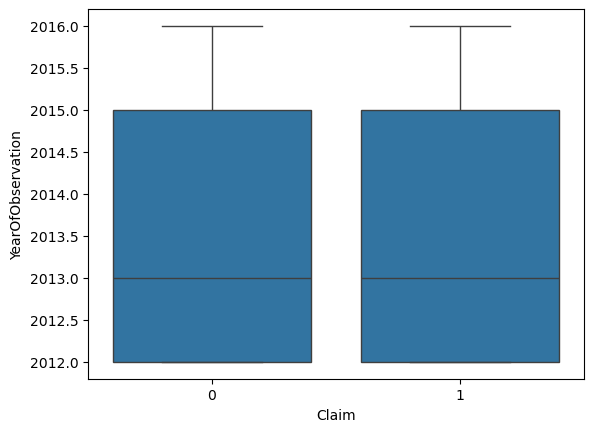

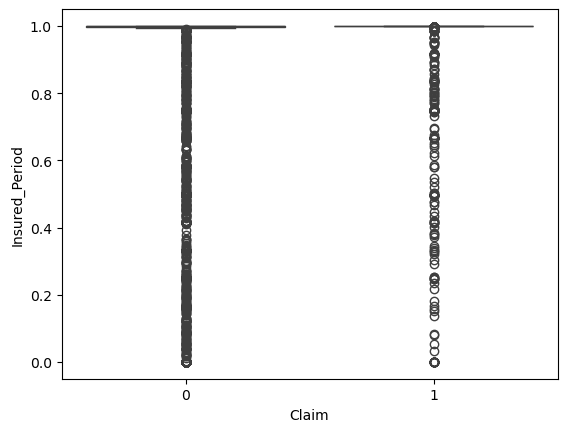

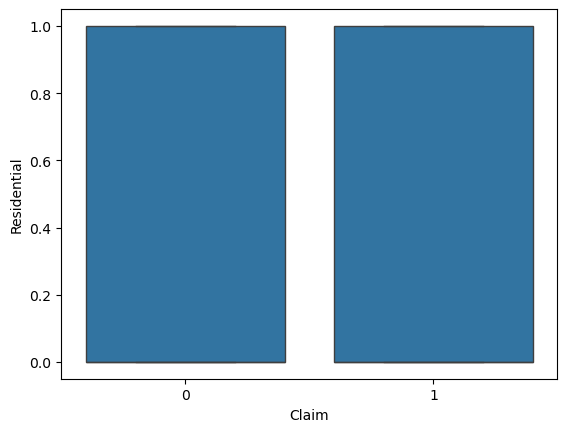

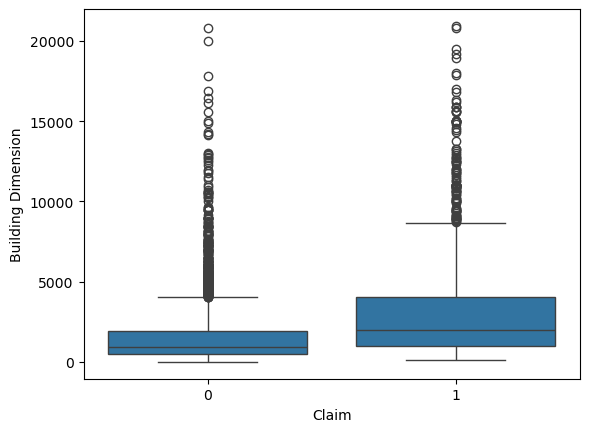

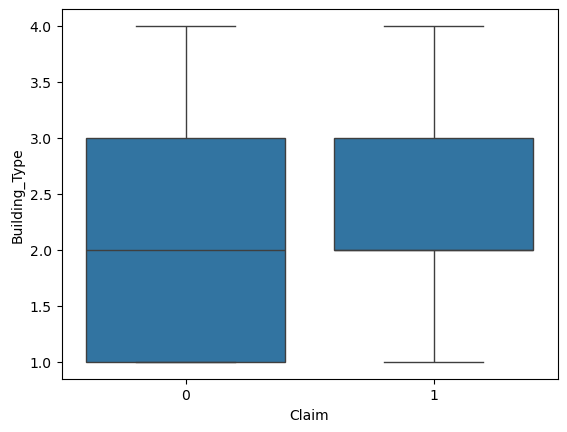

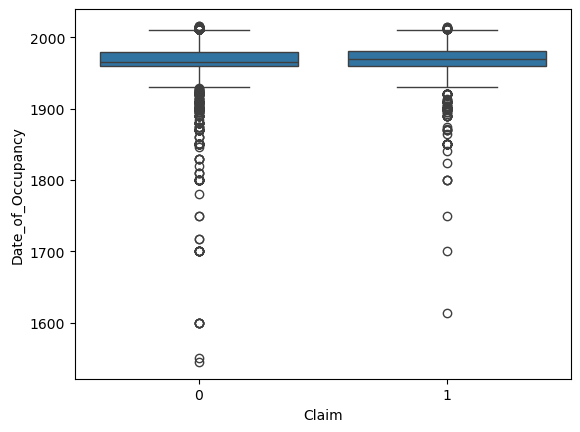

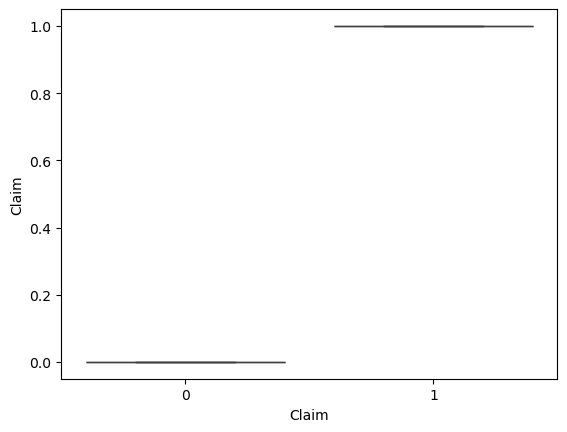

In [ ]:
## Numerical vs Claim

for col in num_col:
    sns.boxplot(x='Claim', y=col, data=df)
    plt.show()

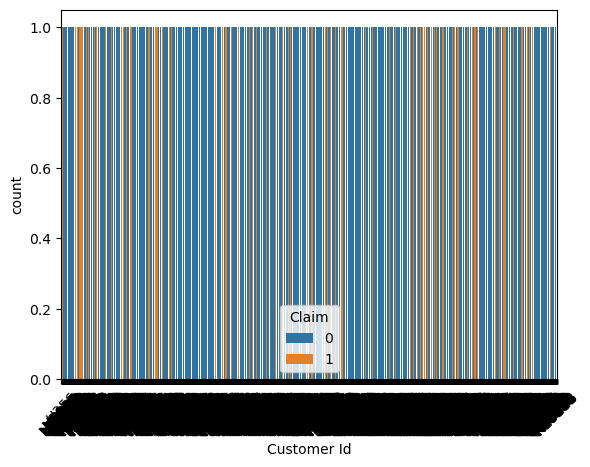

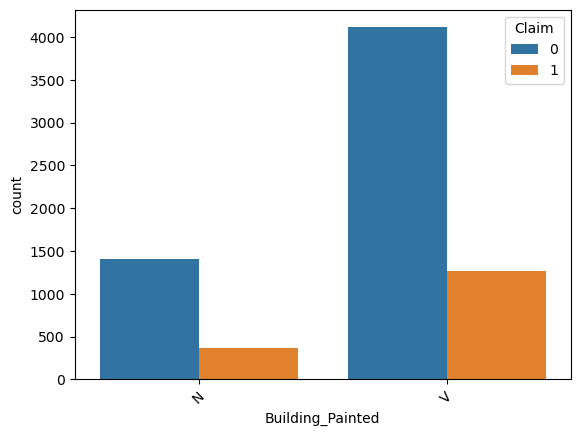

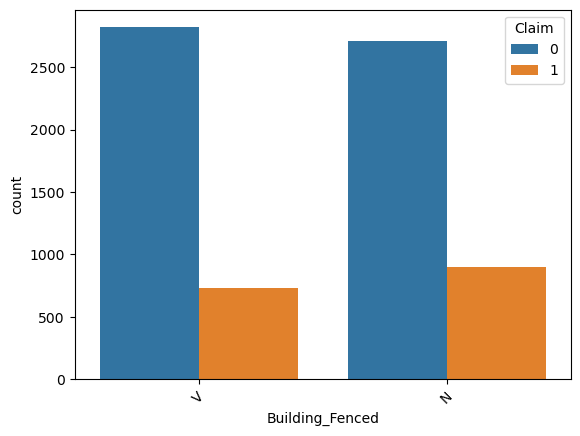

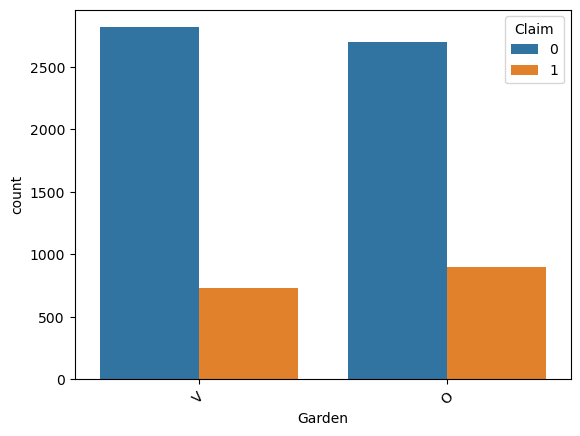

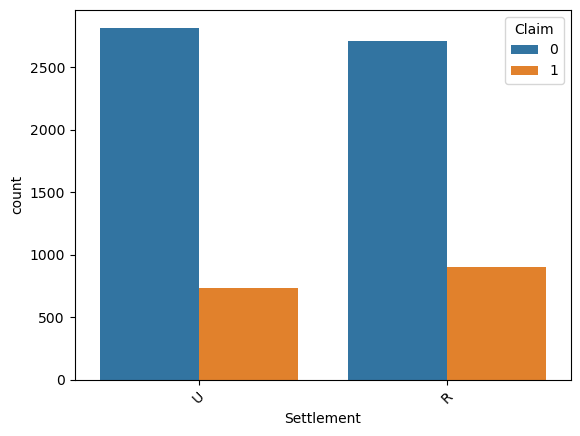

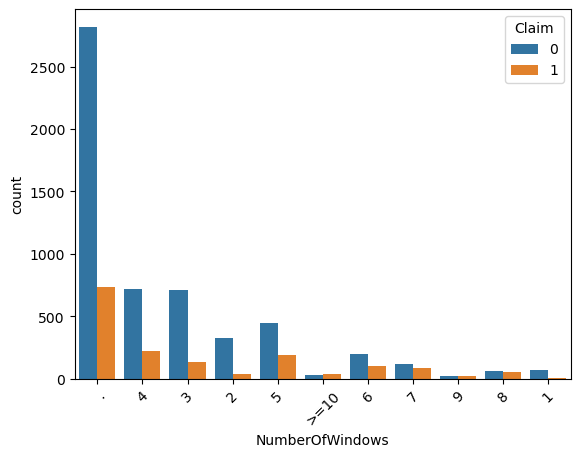

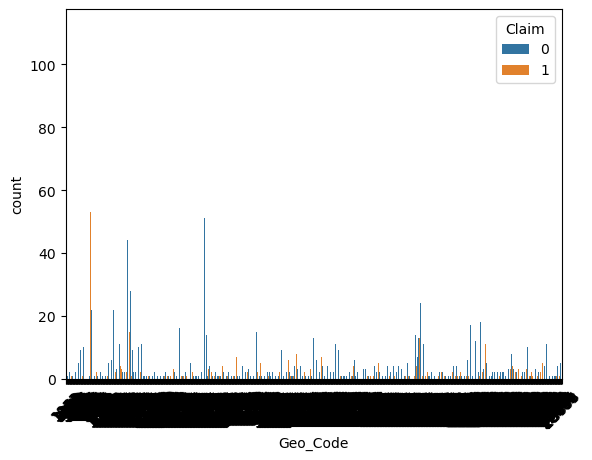

In [53]:
## Categorical vs Claim

for col in cat_col:
    sns.countplot(x=col, hue='Claim', data=df)
    plt.xticks(rotation=45)
    plt.show();


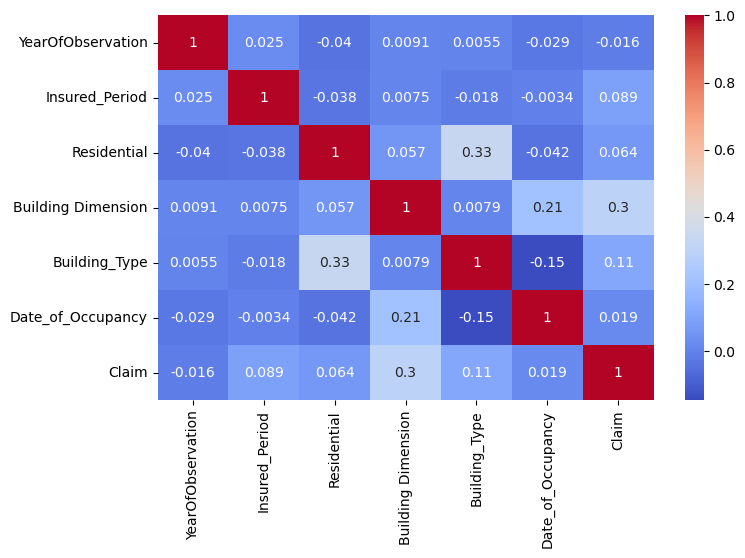

In [55]:
## Correlation Analysis ~ To get the correlation btw features

plt.figure(figsize=(8,5))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.show()

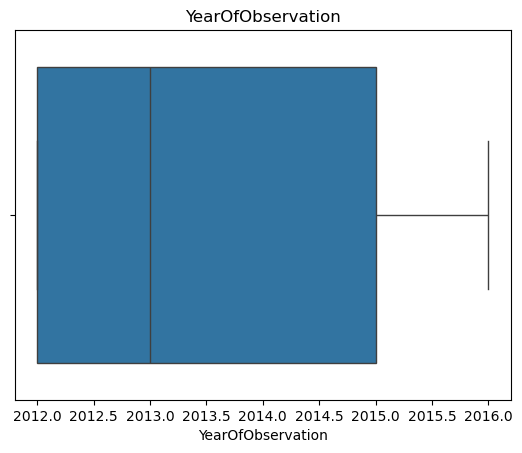

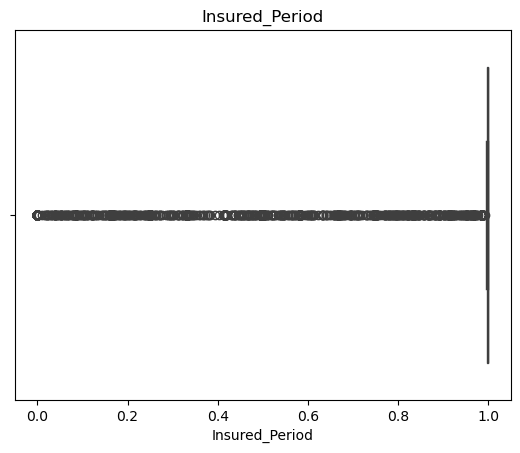

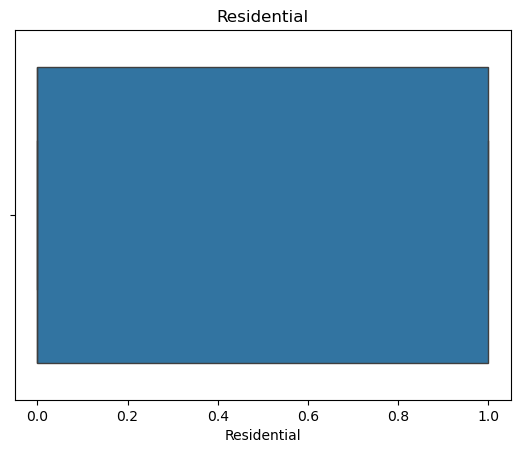

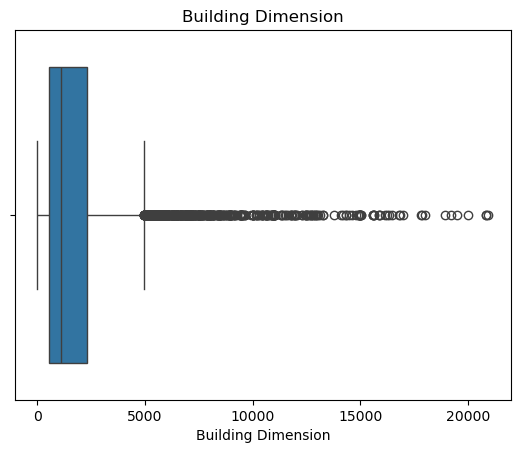

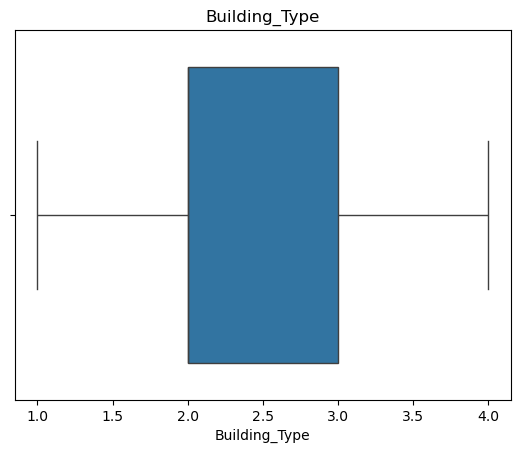

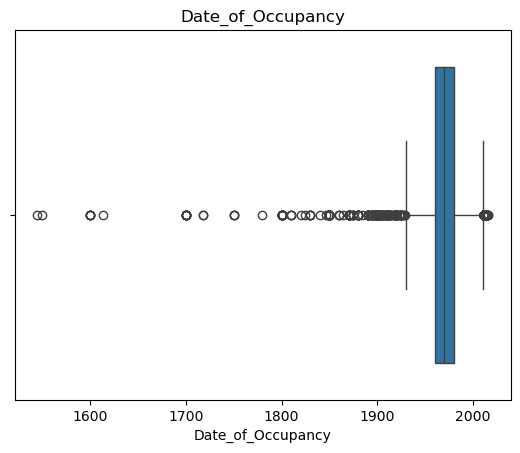

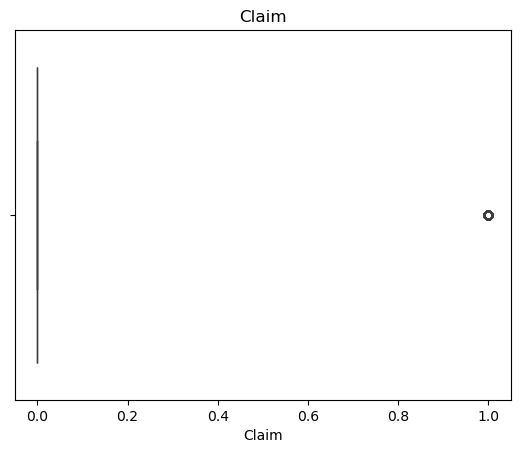

In [ ]:
## For Outlier Detection

for col in num_col:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [68]:
"""SUMMARY OF EDA"""

'SUMMARY OF EDA'


### Key EDA Findings
- Building type 2 & 3 has more insurance claims
- Outliers present in the Date of Occupancy
- Houses with Dimention below 5000 have higher chances for an insurance claim
- 
